# 生物医学常用将数值转化为预测模型有效特征的方法

[官方文档](https://scikit-learn.cn/stable/index.html)
[中文文档](https://scikit-learn.cn/stable/index.html)

## 1. 归一化
归一化（也称为缩放）可能是数据科学家学习的第一个数值特征工程技术。这种方法通过减去平均值并除以标准差来调整变量。

执行此转换后，结果变量将具有0均值和1的标准差及方差。

在机器学习中，特别是深度学习领域，将变量限制在特定范围内（如仅在0和1之间）有助于模型更快地收敛到最优解。这是一种学习型转换 - 我们使用训练数据来推导正确的均值和标准差值，然后在应用于新数据时使用这些值进行转换。

需要注意的是，这种转换不会改变分布，而是重新缩放了值。

我们将使用Sklearn的葡萄酒数据集进行分类任务。我们将比较使用和不使用混淆矩阵归一化的性能，使用Sklearn实现。

C:\Users\32780\AppData\Local\Temp\ipykernel_38772\256414711.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


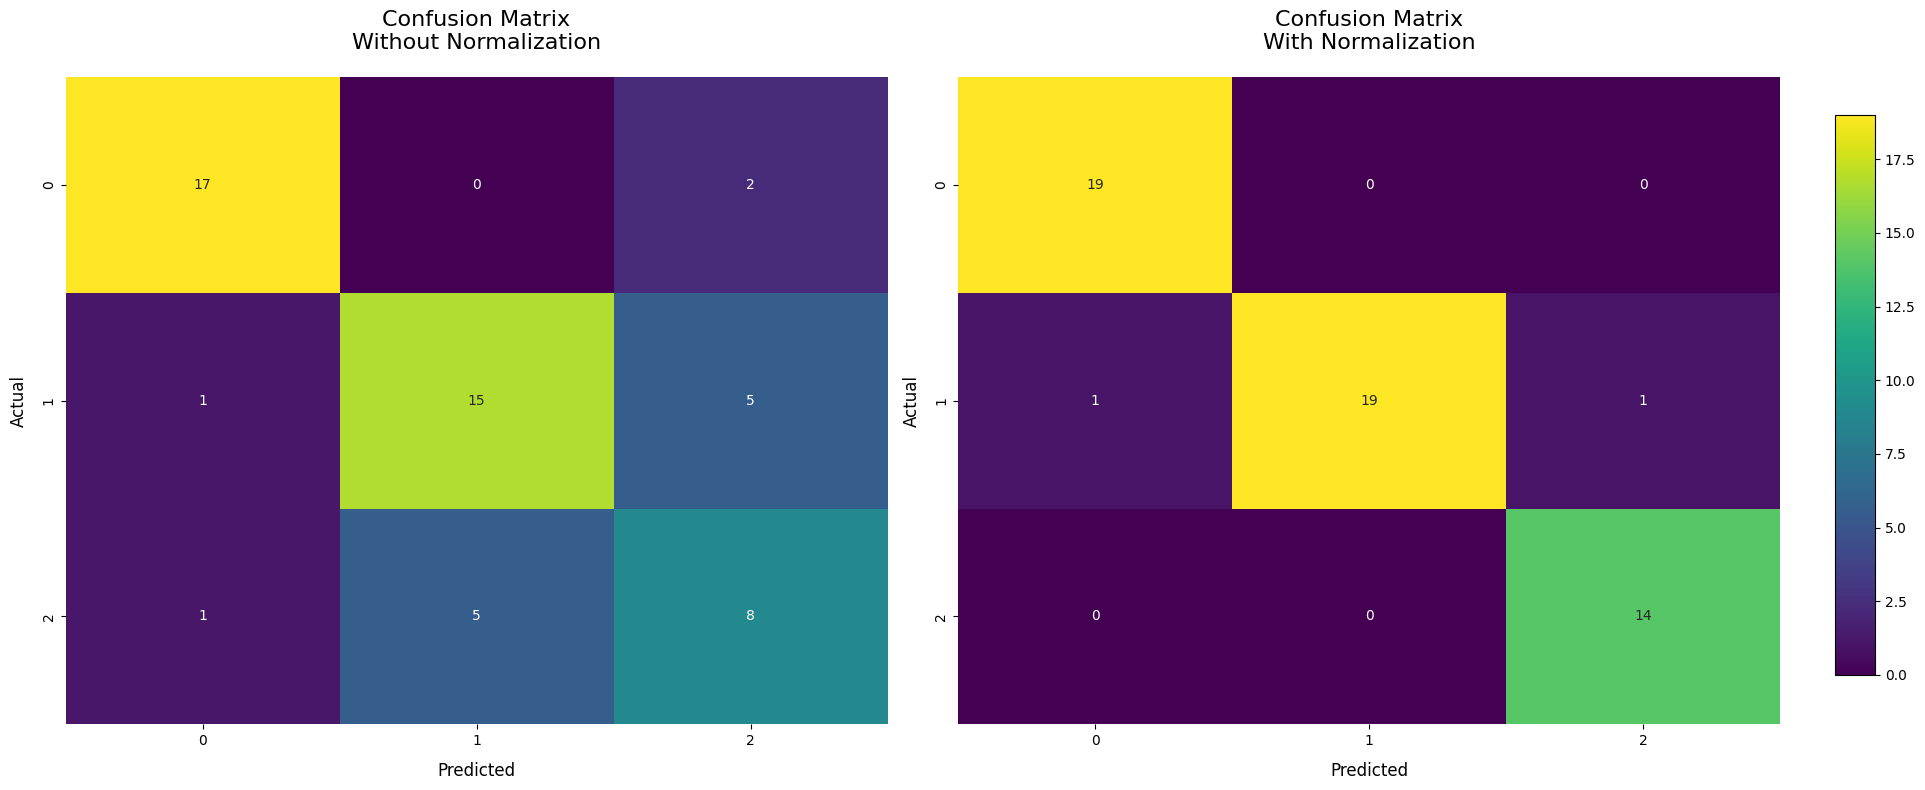

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
import numpy as np 

X, y = load_wine(return_X_y=True) 

# 将数据划分为训练集和测试集 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

# 定义训练模型并获取混淆矩阵的函数 
def get_confusion_matrix(X_train, X_test, y_train, y_test): 
    model = KNeighborsClassifier(n_neighbors=5) 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    return confusion_matrix(y_test, y_pred) 

# 获取未归一化的混淆矩阵 
cm_without_norm = get_confusion_matrix(X_train, X_test, y_train, y_test) 

# 归一化数据 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# 获取归一化后的混淆矩阵 
cm_with_norm = get_confusion_matrix(X_train_scaled, X_test_scaled, y_train, y_test) 

# 创建两个并列的子图 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 

# 定义绘制热图的函数 
def plot_heatmap(ax, cm, title): 
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax, cbar=False) 
    ax.set_title(title, fontsize=16, pad=20) 
    ax.set_xlabel('Predicted', fontsize=12, labelpad=10)
    ax.set_ylabel('Actual', fontsize=12, labelpad=10)

# 绘制热图 
plot_heatmap(ax1, cm_without_norm, 'Confusion Matrix\nWithout Normalization')
plot_heatmap(ax2, cm_with_norm, 'Confusion Matrix\nWith Normalization')

# 添加共用的颜色条 
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=np.max([cm_without_norm, cm_with_norm]))) 
fig.colorbar(sm, cax=cbar_ax) 

# 调整布局并显示图表 
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()

### Sklearn示例中提供了一个更复杂的图表，展示了归一化和未归一化的KNNClassifier模型的分类边界对比

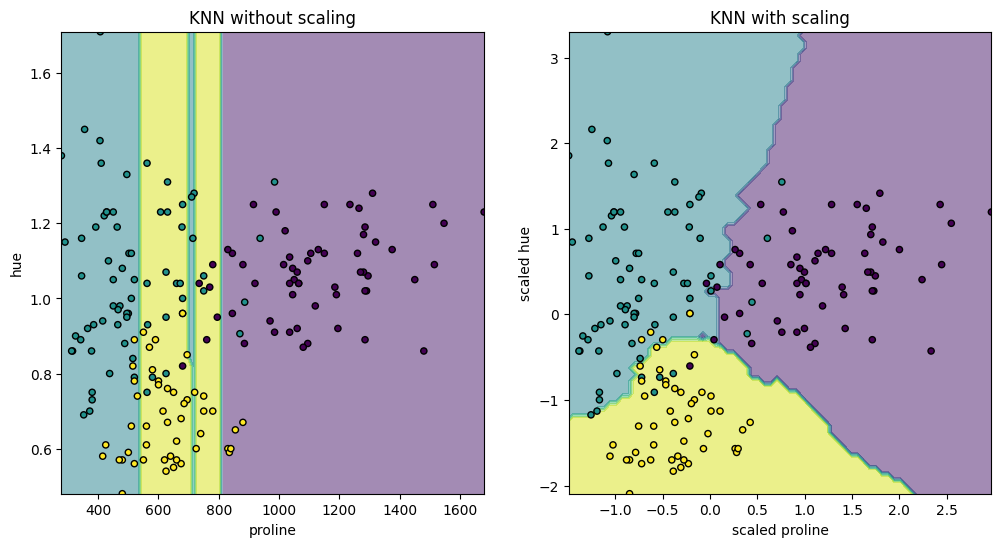

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

## 2. 对数变换
对数变换的主要优势在于其压缩值范围的能力，这对于具有高可变性或异常值的数据特别有用。

范围压缩：对数变换减少了最大值之间的距离，同时保持较小值相对不变。有助于规范化偏斜分布，使右尾分布更对称，更接近正态分布。
线性化：它可以将非线性关系线性化。它将指数关系转换为线性关系，简化了分析并提高了假设变量之间线性关系的模型的性能。
处理异常值：该变换有效地管理极端数据，允许处理异常值而无需删除，从而保留潜在的重要信息。
数学定义：最常见的对数变换使用自然对数（以e为底），定义为 y =ln(x)，其中 x 是原始值，y 是变换后的值。请注意，这种变换仅对正值的 x 定义，如果存在零或负值，可能需要添加常数。
特征缩放：它可以用作特征缩放技术，补充或替代标准化或最小-最大规范化等方法。可以提高线性回归等模型的性能，这些模型受益于具有更对称分布的特征。
在机器学习中，当想要规范化一个不是自然分布的分布时，通常会使用对数变换。

例如，一个众所周知的不正态分布的变量是年收入 —— 你经常想要对这个变量建模以提供价值预测，但使用这种分布工作并不方便，特别是如果你使用不能正确建模非线性数据的算法。

通过对数变换，使用numpy，可以趋向正态分布，使变量更容易预测。

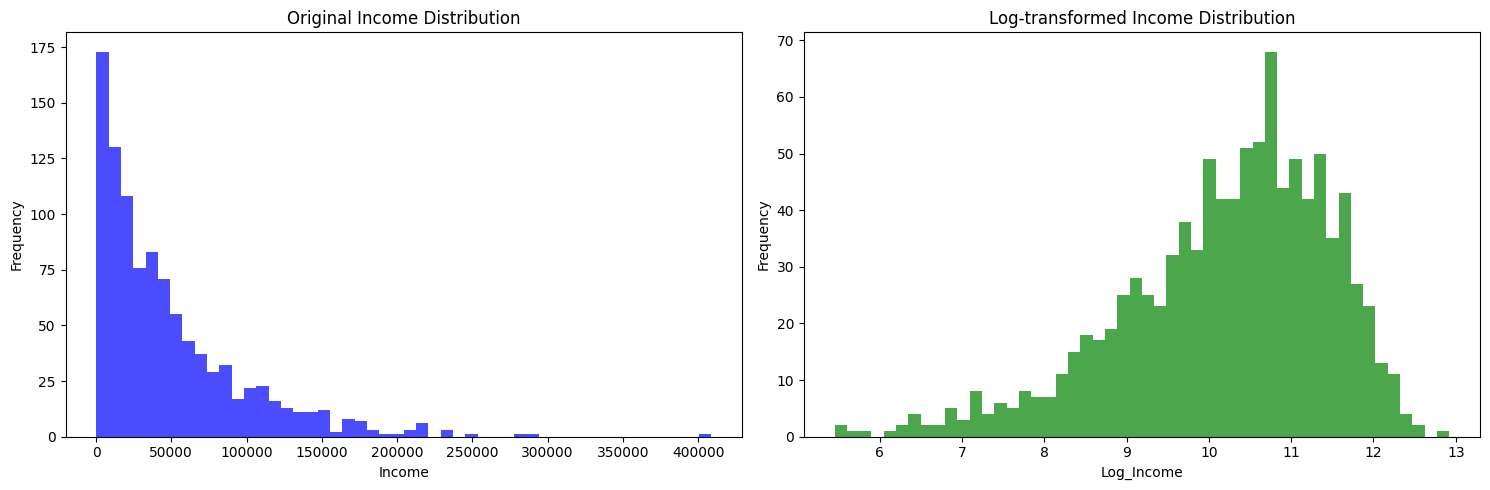

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# 创建一个具有正偏度值的示例数据集 
np.random.seed(42) 
data = { 
'Income': np.random.exponential(scale=50000, size=1000) # 指数分布以模拟偏度 
} 
df = pd.DataFrame(data) 

# 创建一个具有两个并排子图的图形 
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

# 原始分布的图 
axes[0].hist(df['Income'], bins=50, color='blue', alpha=0.7) 
axes[0].set_title('Original Income Distribution') 
axes[0].set_xlabel('Income') 
axes[0].set_ylabel('Frequency') 

# 应用对数变换 
df['Log_Income'] = np.log1p(df['Income']) # log1p相当于log(x + 1) 

# 变换后分布的图 
axes[1].hist(df['Log_Income'], bins=50, color='green', alpha=0.7) 
axes[1].set_title('Log-transformed Income Distribution') 
axes[1].set_xlabel('Log_Income') 
axes[1].set_ylabel('Frequency') 

# 显示图形 
plt.tight_layout() 
plt.show()

## 3. Box-Cox变换
Box-Cox变换是一系列幂变换，可以稳定方差并使数据更接近正态分布。它在数学上定义为：

y(λ) = (y λ — 1) / λ 如果 y ≠ 0
y(λ) = log(y) 如果 y = 0
其中：

x 是原始值，
y 是变换后的值，
λ 是变换参数
Box-Cox变换应用于正数据，并要求从数据中估计参数λ，以找到使数据正态化的最佳变换。

PowerTransformer的行为类似于Sklearn估计器，支持.fit()和.transform()方法。

Yeo-Johnson变换基于Box-Cox变换，但允许负值。本文不会详细介绍Yeo-Johnson变换。

如前所述，Yeo-Johnson变换基于Box-Cox变换，但lambda可以取的值可能会改变。这使得这些变换本质上不同，因为它们可能给出不同的结果。

在Python中，只需将其中一种变换方法作为字符串传递给PowerTransformer对象

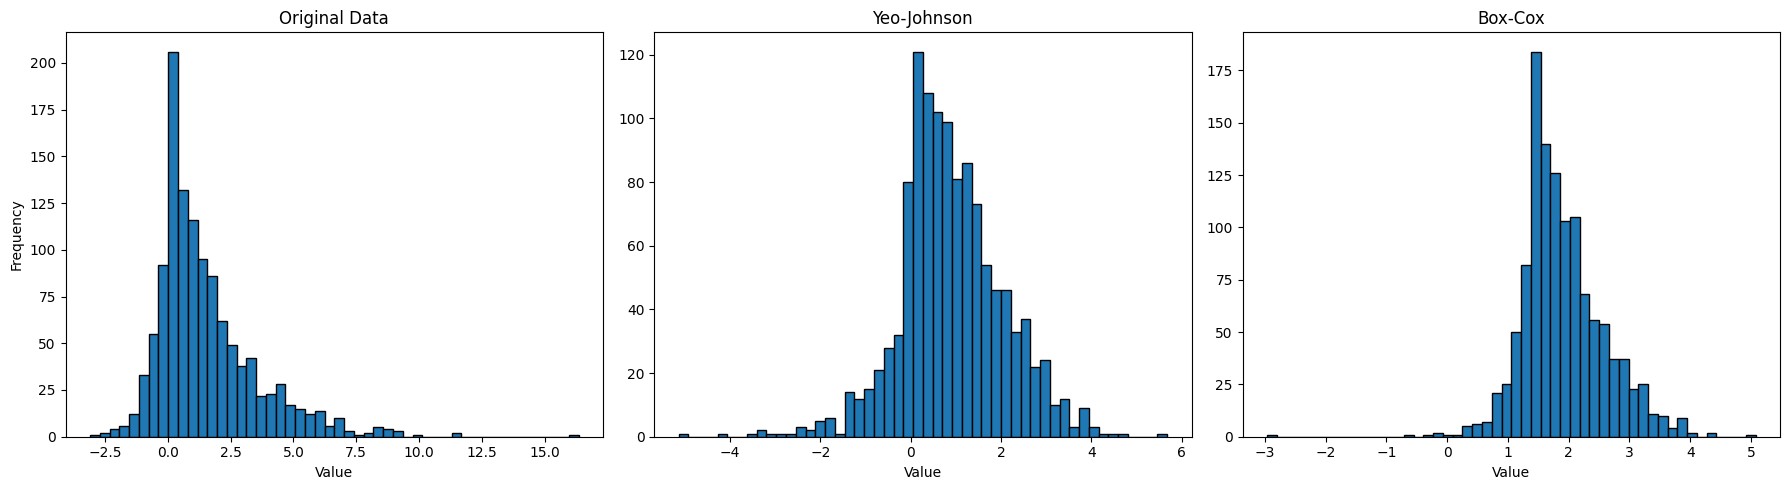

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PowerTransformer 

# 生成包含正值和负值的数据 
np.random.seed(42) 
data_positive = np.random.exponential(scale=2, size=1000) # 正值 
data_negative = -np.random.exponential(scale=0.5, size=200) # 负值 
data = np.concatenate([data_positive, data_negative]) # 合并正值和负值数据 

# 创建两个PowerTransformer实例：一个用于Yeo-Johnson，一个用于Box-Cox进行比较 
pt_yj = PowerTransformer(method='yeo-johnson', standardize=False) # Yeo-Johnson变换 
pt_bc = PowerTransformer(method='box-cox', standardize=False) # Box-Cox变换 

# 应用变换 
data_yj = pt_yj.fit_transform(data.reshape(-1, 1)) # 应用Yeo-Johnson变换 

# Box-Cox需要正数据，所以我们添加一个偏移量使所有值为正 
data_offset = data - np.min(data) + 1e-6 # 偏移量以确保所有值为正 
data_bc = pt_bc.fit_transform(data_offset.reshape(-1, 1)) # 应用Box-Cox变换 

# 可视化结果 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5)) 

# 原始数据的直方图 
ax1.hist(data, bins=50, edgecolor='black') 
ax1.set_title("Original Data") 
ax1.set_xlabel("Value") 
ax1.set_ylabel("Frequency") 

# Yeo-Johnson变换后数据的直方图 
ax2.hist(data_yj, bins=50, edgecolor='black') 
ax2.set_title("Yeo-Johnson") 
ax2.set_xlabel("Value") 

# Box-Cox变换后数据的直方图 
ax3.hist(data_bc, bins=50, edgecolor='black') 
ax3.set_title("Box-Cox") 
ax3.set_xlabel("Value") 

plt.tight_layout() 
plt.show()

## 4. QuantileTransformer
分位数变换将一个变量的分布映射到另一个目标分布。使用Sklearn的QuantileTransformer类，可以将非正态分布转换为所需的分布。

考虑任何事件分布 —— 这个分布中的每个事件都会有一个与之相关的发生概率。这种行为由累积分布函数(CDF)定义，每种分布的CDF都不同。

分位数函数是CDF的逆：而CDF是一个返回值等于或小于给定值的概率的函数，PPF（百分位点函数）是这个函数的逆，返回等于或小于给定概率的值。

在异常值检测的背景下，QuantileTransformer可用于转换数据以使其更加可见。通过将数据转换为均匀分布，异常值将被映射到分布的极端，使它们与内部点更容易区分。

QuantileTransformer可以将任意分布强制转换为高斯分布，前提是有足够的训练样本（数千个）。由于它是一种非参数方法，比参数方法（Box-Cox和Yeo-Johnson）更难解释。

Sklearn再次为我们提供了专用的QuantileTransformer对象，其中一个重要参数是output_distribution，它可以接受"uniform"或"normal"值。这些代表数据被映射到的分布。

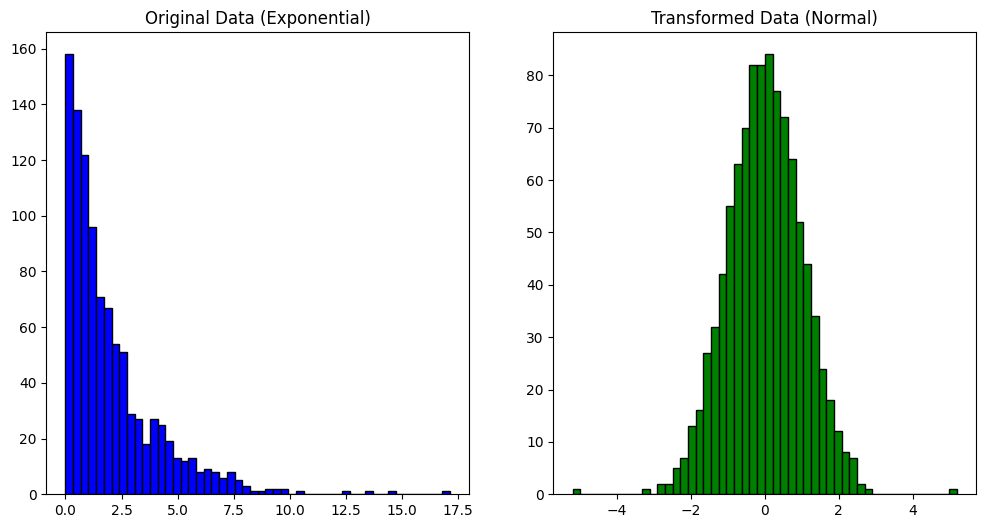

In [5]:
import numpy as np 
from sklearn.preprocessing import QuantileTransformer 
import matplotlib.pyplot as plt 

# 创建一个具有偏斜分布的样本数据集 
np.random.seed(0) 
data = np.random.exponential(scale=2, size=(1000, 1)) # 指数分布 

# 初始化QuantileTransformer 
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal') 

# 应用变换 
data_transformed = quantile_transformer.fit_transform(data) 

# 可视化原始和变换后的数据 
plt.figure(figsize=(12, 6)) 

# 原始数据的直方图 
plt.subplot(1, 2, 1) 
plt.hist(data, bins=50, color='blue', edgecolor='black') 
plt.title("Original Data (Exponential)") 

# 变换后数据的直方图 
plt.subplot(1, 2, 2) 
plt.hist(data_transformed, bins=50, color='green', edgecolor='black') 
plt.title("Transformed Data (Normal)") 

plt.show()

## Effect of rescaling on a PCA dimensional reduction

Dimensional reduction using PCA consists of finding the features that maximize the variance. If one feature varies more than the others only because of their respective scales, PCA would determine that such feature dominates the direction of the principal components.

We can inspect the first principal components using all the original features:

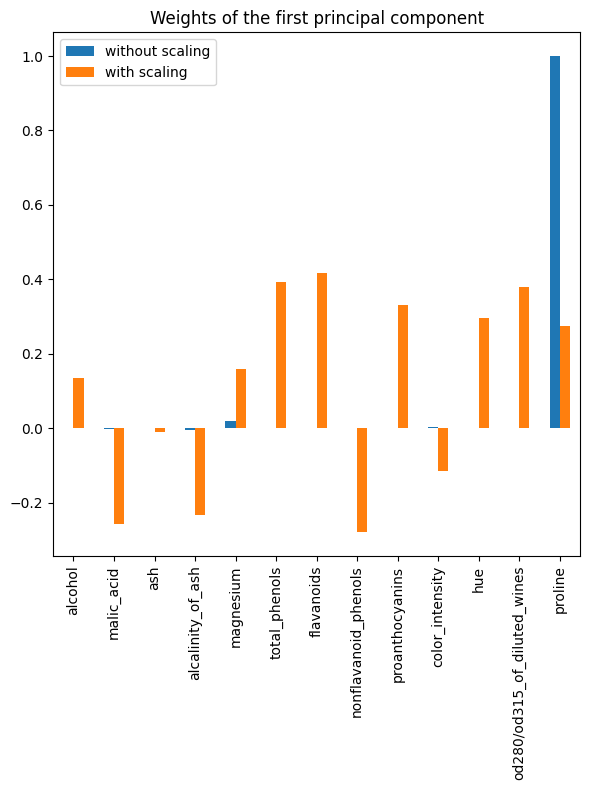

In [6]:
import pandas as pd

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

Indeed we find that the “proline” feature dominates the direction of the first principal component without scaling, being about two orders of magnitude above the other features. This is contrasted when observing the first principal component for the scaled version of the data, where the orders of magnitude are roughly the same across all the features.

We can visualize the distribution of the principal components in both cases:

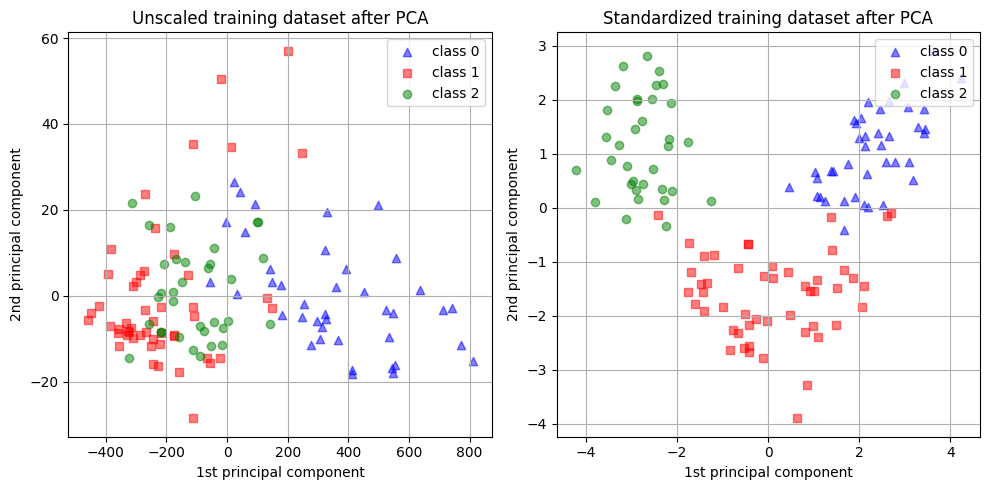

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()